In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model

%matplotlib inline

debug = True
path = 'exercises/data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['x1', 'y'])

data.head()

,x1,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


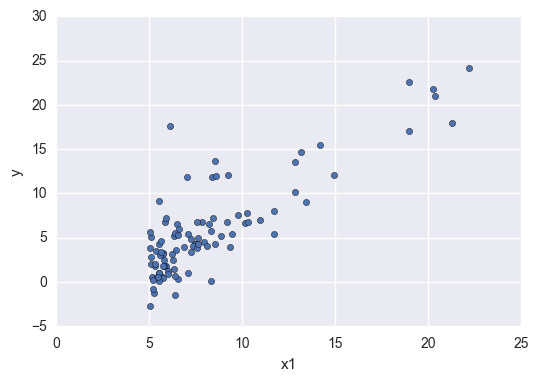

In [3]:
data.plot(kind='scatter', x='x1', y='y', figsize=(6,4))  

In [2]:
# Insert first column (X0) with all 1s
data.insert(0,'x0',1)
data.head()

,x0,x1,y
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233



## Notes

#### Linear Regression sklearn
~~~~
X                       # numpy array of shape [n_samples(m), n_features(n)]
y                       # numpy array of shape [n_samples(m), n_targets(1)]

coef_                   # shape (n_features, ) or (n_targets, n_features)
intercept_              # array (But we think it cant be array!!)

 predict(X)
 X                       # numpy array of shape [n_samples, n_features]
 C                       # Returns : array of shape [n_samples,]
~~~~

#### Using Andrew NGs course in matlab, 
- with 1500 Iterations:
`
   J = Cost = 4.4834
   Theta found by gradient descent: -3.630291 1.166362 
   For population = 35,000, we predict a profit of 4519.767868
   For population = 70,000, we predict a profit of 45342.450129
`
- with 5500 Iterations:
`   J = Cost = 4.4770
   Theta found by gradient descent: -3.895586 1.193014 
   For population = 35,000, we predict a profit of 2799.632412
   For population = 70,000, we predict a profit of 44555.124696`

In [3]:
#m = data.y.size    # m : sample size

#X_train = X[:-20]  # Start to end - 20
#X_test  = X[-20:]  # Last 20
#y_train = y[:-20]
#y_test  = y[-20:]

In [4]:
def computeCost(X, y, theta):
    if debug:
        print("shape of X", X.shape)
        print("shape of y", y.shape)
        print("shape of theta", theta.shape)
        print("size of y", y.size)
        print("X * theta.T = ", (X * theta.T))
    inner = np.power(((X.dot(theta)) - y), 2)
    if debug:
        print("inner is ", np.sum(inner))
    return (np.sum(inner) / (2.0 * y.size))


In [5]:
def linearRegressionSKFit(X, y):
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    return regr

def printThethaFromRegr(regr):
    sklearn_theta = regr.coef_
    sklearn_theta = np.hstack((regr.intercept_,sklearn_theta))  # In [Theta0, Theta1] format
    print("Theta: ", sklearn_theta)
    return sklearn_theta

def linearRegressionSKPredict(regr, test_x):
    predict_y = regr.predict(test_x.reshape(-1,1))
    return predict_y

In [6]:
X = data['x1']            # Input with first column as 1, X0 (population)
print(type(X))            # X is of type Series
X = X.reshape(-1, 1)      # Reshape since the orig shape is not in (x,y) format
y = data['y']             # Output from sample  (profit)

regrData1Ex1 = linearRegressionSKFit(X,y)
sklearn_theta = printThethaFromRegr(regrData1Ex1)

# Compute cost when theta is 0
c1 = computeCost(data.ix[:,0:2].as_matrix(), y.reshape(-1,1), np.array([0,0]).reshape(-1,1) )
print("Cost (Mean Square error) with theta (0, 0) = ",c1)

######################### Print Cost #########################
# Compute the costs using original Theta(from manual coding using NG course) and Theta found using sklearn
theta = np.array([-3.63029144, 1.16636235])   # Got from some guy online

sklearnCost = computeCost(data.ix[:,0:2].as_matrix(), y.reshape(-1,1), sklearn_theta.reshape(-1,1))
andrewCost = computeCost(data.ix[:,0:2].as_matrix(), y.reshape(-1,1), theta.reshape(-1,1))
print("Cost (Mean Square error) of sklearn theta = ",sklearnCost)
print("Cost (Mean Square error) of NG course theta = ",andrewCost)


<class 'pandas.core.series.Series'>
Theta:  [-3.89578088  1.19303364]
shape of X (97, 2)
shape of y (97, 1)
shape of theta (2, 1)
size of y 97
X * theta.T =  [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0. 

/usr/local/lib/python3.3/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [7]:
######################### Predict the profit #########################
# Predict the profit for 7 and 3.5

test_x = np.array([3.5,7]).reshape(-1,1)
predict_y = linearRegressionSKPredict(regrData1Ex1, test_x)

print("Profit predicted using skelearn for 7 and 3.5 : ",predict_y)

Profit predicted using skelearn for 7 and 3.5 :  [ 0.27983688  4.45545463]


Andrew Y   :  [-2.46392909 -1.88074792 -1.29756674 -0.71438557 -0.13120439  0.45197678
  1.03515796  1.61833913  2.20152031  2.78470148  3.36788266  3.95106383]
SKLearns predict():  [-2.70274723 -2.10623041 -1.50971359 -0.91319677 -0.31667995  0.27983688
  0.8763537   1.47287052  2.06938734  2.66590416  3.26242099  3.85893781]
test_y - sklearn_y:  [ 0.23881814  0.2254825   0.21214685  0.1988112   0.18547556  0.17213991
  0.15880426  0.14546861  0.13213297  0.11879732  0.10546167  0.09212603]


/usr/local/lib/python3.3/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


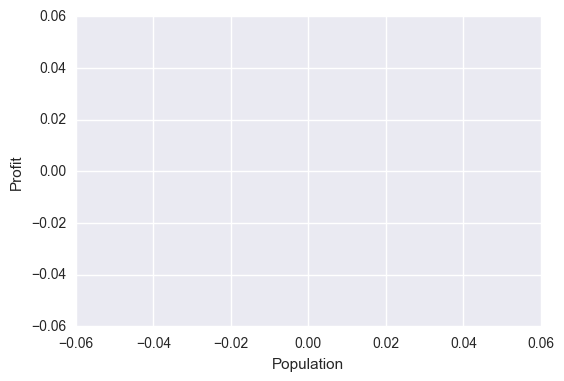

In [42]:
regr = regrData1Ex1
# X in range 1 to 7 with step of .5
test_x = np.arange(1,7,.5)

# Apply the hypothesis and get Y
test_y    = theta[0] + (theta[1] * test_x)

# Get y using manual formula application
sklearn_y = regr.intercept_ + (regr.coef_[0] * test_x)

# Get y using regrs predict() function
predict_y = regr.predict(test_x.reshape(-1,1))

plt.plot(kind='scatter', x=test_x, y=test_y ,   c='r', label='test_y')

plt.plot(kind='scatter', x=test_x, y=sklearn_y, c='g', label='sklearn_y')

plt.plot(kind='scatter', x=test_x, y=predict_y, label='predict_y')

#print("sklearn_theta0 = ",regr.intercept_ )
#print("sklearn_theta1 = ",regr.coef_)
print("Andrew Y   : ",test_y)
print("SKLearns predict(): ",predict_y)
#print("SKLearns manual formula: ",sklearn_y)
print("test_y - sklearn_y: ",test_y - predict_y)

#plt.plot(Cost_J)
#plt.ylabel('Cost J')
#plt.xlabel('Iterations');

#print(regr.predict(np.array([7,3.5]).reshape(-1,1)))

#plt.xlim(4,24)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend(loc=1);

## Multivariate Linear Regression

Cost of model should be : 0.13070336960771897

### Answers (from various sources)

Theta: 340412.7, 110631.1, -6649.474

Prediction for a house with 1650 square feet and 3 bedrooms: 293081.5

### TODO
* Divide the data into X_train and X_test and then use fit()/predict()
* After that, plot the Cost vs m and find out variance and bias

### Lessons Learned
* Normalization should be done only on input features(X)
* Shoud normalization be done on Y? (http://stats.stackexchange.com/questions/56699/confusion-related-to-data-normalization)
* If you are normalizing train_X, during prection you have to normalize the input X using the same formula!



In [9]:
path2 = '../ex1/ex1data2.txt'
data2 = pd.read_csv(path2, header=None, names=['size', 'bhk', 'price'])

###################### Exploring the data ########################
data2.head()
data2.shape[1]

3

In [10]:
def featureNormalize(X):
    return (X - X.mean()) / X.std()
    

In [11]:
norm_X = featureNormalize(data2[['size','bhk']])
norm_X.head()


,size,bhk
0,0.130010,-0.223675
1,-0.504190,-0.223675
2,0.502476,-0.223675
3,-0.735723,-1.537767
4,1.257476,1.090417


In [12]:
Y = data2['price']
norm_Y = featureNormalize(data2['price'])
#norm_Y.head()

In [13]:
norm_X.insert(0,'x0',1)
norm_X.head()

,x0,size,bhk
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [14]:
X = norm_X[['size','bhk']]            # Input with first column as 1, X0 (population)
##X = X.reshape(-1, 1)      # Reshape since the orig shape is not in (x,y) format
#y = data2['price']             # Output from sample  (profit)
X
regrData1Ex2 = linearRegressionSKFit(X, Y)
sklearn_theta_ex2 = printThethaFromRegr(regrData1Ex2)

regrData1Ex2_normY = linearRegressionSKFit(X, norm_Y)
sklearn_theta_ex2_normY = printThethaFromRegr(regrData1Ex2_normY)

# Theta:  [ 340412.65957447  110631.05027885   -6649.47427082]   (with original Y)
# Theta:  [ -1.18669176e-16   8.84765988e-01  -5.31788197e-02]   (with Y also normalized)

Theta:  [ 340412.65957447  110631.05027885   -6649.47427082]
Theta:  [ -1.18669176e-16   8.84765988e-01  -5.31788197e-02]


In [15]:
def computeCostEx2(X, y, theta):
    if debug:
        print("shape of X", X.shape)
        print("shape of y", y.shape)
        print("shape of theta", theta.shape)
        print("size of y", y.size)
        #print("X * theta.T = ", (X.dot(theta)))
    inner = np.power(((X.dot(theta)) - y), 2)
    if debug:
        print("inner is ", np.sum(inner))
    return (np.sum(inner) / (2.0 * y.size))

In [16]:

# Compute cost when theta is 0
c1 = computeCostEx2(norm_X.ix[:,0:3].as_matrix(), Y, np.array([0,0,0]) )
print("Cost (Mean Square error) with theta (0, 0) = ",c1)

sklearnCost = computeCostEx2(norm_X.ix[:,0:3].as_matrix(), Y, sklearn_theta_ex2)

print("Cost (Mean Square error) of sklearn theta = ",sklearnCost)


shape of X (47, 3)
shape of y (47,)
shape of theta (3,)
size of y 47
inner is  6.16560552201e+12
Cost (Mean Square error) with theta (0, 0) =  65591548106.5
shape of X (47, 3)
shape of y (47,)
shape of theta (3,)
size of y 47
inner is  192068324757.0
Cost (Mean Square error) of sklearn theta =  2043280050.6


In [36]:

data2['size_n'] = featureNormalize(data2['size'])
data2['bhk_n'] = featureNormalize(data2['bhk'])
#print(data2)
#print(Y.head())
#X.head()
predict_Y = regrData1Ex2.predict(X)
print(predict_Y[0:5])
#print("shape of predict_y")
#print(predict_Y - Y)
#plt.plot(predict_Y - Y)

input_x1 = (1650 - data2['size'].mean())/ data2['size'].std() 
input_x2 = (3 - data2['bhk'].mean())/ data2['bhk'].std()
#            (3 - mean(dta["bedrooms"]))/sd(dta["bedrooms"])


test_x = np.array([input_x1, input_x2])

sklearn_ex2_y = regrData1Ex2.intercept_ + (test_x.dot(regrData1Ex2.coef_))

print("Using manual multiplication: ", sklearn_ex2_y)
print("Using sklearn: ", regrData1Ex2.predict(test_x))

[ 356283.1103389   286120.93063401  397489.46984812  269244.1857271
  472277.85514636]
Using manual multiplication:  293081.464335
Using sklearn:  [ 293081.4643349]


/usr/local/lib/python3.3/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
